In [1]:
# General
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Classifer
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import svm #SVM
from sklearn.neural_network import MLPClassifier #Neural Network
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent

# PR curve
# from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# Decision Tree plot
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus

#Cross Validation
from sklearn.model_selection import cross_val_score

/Users/becca/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
def file_reader(path):
    df=pd.DataFrame()
    chunksize = 10 ** 6
    for chunk in pd.read_csv(path, chunksize=chunksize, index_col=[0]):
        df = df.append(chunk)
    return df

country='China'
data=file_reader('/Volumes/BECCA/Project/Data/Input/02_Preprocessing/05_Final/%s.csv' %country)

In [4]:
data

,tweet_text,polarity_number,subjectivity_number,repeat_tag,freq_tag,day,hour,minute,suspend
0,Necessity is the mother of invention,0.500000,0.000000,0,0,4,21,21,1
1,#病毒 Constantly defying the will of the citize...,0.425000,0.316667,1,0,3,5,9,1
2,#肺炎 #病毒 The priceless life should not be the...,0.654167,0.383333,0,0,5,2,37,1
3,"Want to see the walking dead, but feel a littl...",0.403125,0.450000,0,0,2,5,57,1
4,Maybe should call that Kekong? #HongKong #Keki...,0.500000,0.000000,0,0,4,1,39,1
...,...,...,...,...,...,...,...,...,...
44293,@ace_critic @realDonaldTrump @narendramodi The...,0.500000,0.000000,0,0,3,2,48,0
44294,RT @F1Bathurst2015: @catherine___c @tyrelle123...,0.538889,0.544444,0,0,3,9,24,0
44295,RT @YeOldHongKonger: .\nBioterorist Xi Jinping...,0.500000,0.100000,0,0,3,0,25,0
44296,@GauravS101418 @narendramodi Hahaha... So u ex...,0.600000,0.400000,0,0,3,1,57,0


In [5]:
#scaling data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
for i in data.columns:
    if i != 'tweet_text':
        x = np.array(data[i]).reshape(-1,1)
        data[i] = min_max_scaler.fit_transform(x)

In [6]:
data

,tweet_text,polarity_number,subjectivity_number,repeat_tag,freq_tag,day,hour,minute,suspend
0,Necessity is the mother of invention,0.500000,0.000000,0.0,0.0,0.666667,0.913043,0.355932,1.0
1,#病毒 Constantly defying the will of the citize...,0.425000,0.316667,1.0,0.0,0.500000,0.217391,0.152542,1.0
2,#肺炎 #病毒 The priceless life should not be the...,0.654167,0.383333,0.0,0.0,0.833333,0.086957,0.627119,1.0
3,"Want to see the walking dead, but feel a littl...",0.403125,0.450000,0.0,0.0,0.333333,0.217391,0.966102,1.0
4,Maybe should call that Kekong? #HongKong #Keki...,0.500000,0.000000,0.0,0.0,0.666667,0.043478,0.661017,1.0
...,...,...,...,...,...,...,...,...,...
44293,@ace_critic @realDonaldTrump @narendramodi The...,0.500000,0.000000,0.0,0.0,0.500000,0.086957,0.813559,0.0
44294,RT @F1Bathurst2015: @catherine___c @tyrelle123...,0.538889,0.544444,0.0,0.0,0.500000,0.391304,0.406780,0.0
44295,RT @YeOldHongKonger: .\nBioterorist Xi Jinping...,0.500000,0.100000,0.0,0.0,0.500000,0.000000,0.423729,0.0
44296,@GauravS101418 @narendramodi Hahaha... So u ex...,0.600000,0.400000,0.0,0.0,0.500000,0.043478,0.966102,0.0


# L1-based feature selection / k=7

In [7]:
combination_name='All'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

X=np.array(data)[:,1:8].astype('float')
y=np.array(data)[:,8].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.79 (std = 0.03)
Score of SVM = 0.76 (std = 0.03)
Score of nn = 0.76 (std = 0.04)
Score of lr = 0.77 (std = 0.04)
Score of sgd = 0.75 (std = 0.04)


In [8]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

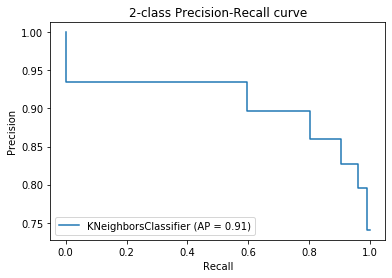

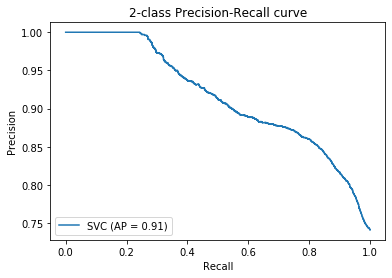

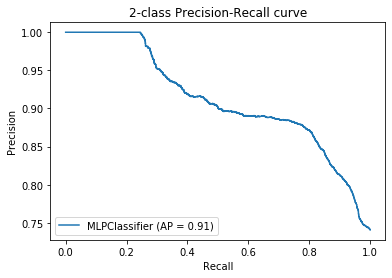

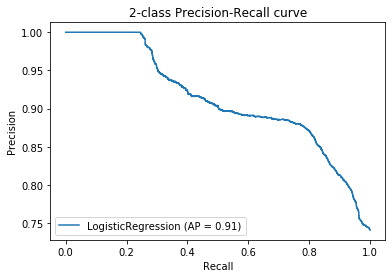

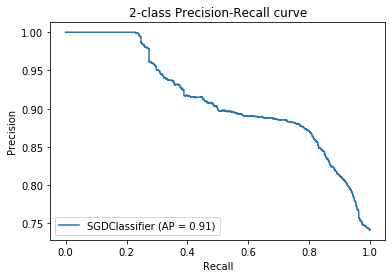

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','SVM', 'nn','lr','sgd']
classifier = [knn,SVM, nn, lr, sgd]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [10]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result=pd.DataFrame(result)
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,All,SVM,6147,1569,729,414,0.776160,0.936900,0.796656,0.861105
2,All,nn,5973,1417,881,588,0.773676,0.910380,0.808254,0.856283
3,All,lr,6019,1460,838,542,0.774015,0.917391,0.804787,0.857407
4,All,sgd,6222,1744,554,339,0.764872,0.948331,0.781070,0.856612


# k=6

In [11]:
combination_name='k=6'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

X=np.array(data)[:,2:8].astype('float')
y=np.array(data)[:,8].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.78 (std = 0.04)
Score of SVM = 0.76 (std = 0.04)
Score of nn = 0.77 (std = 0.04)
Score of lr = 0.77 (std = 0.04)
Score of sgd = 0.75 (std = 0.03)


In [12]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

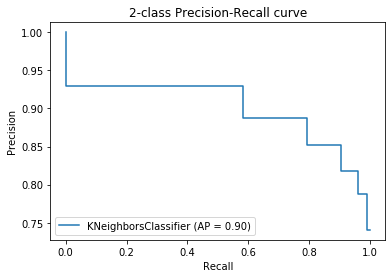

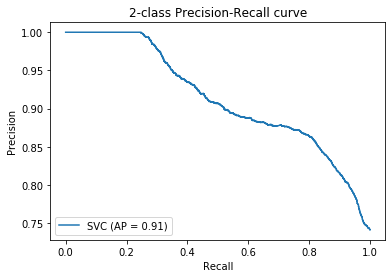

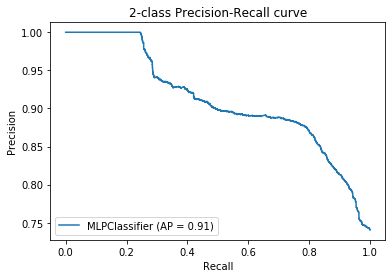

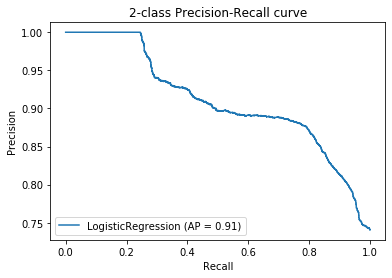

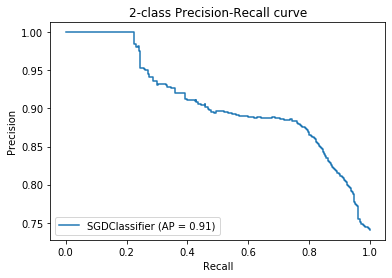

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','SVM','nn','lr','sgd']
classifier = [knn, SVM, nn, lr, sgd]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [14]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,All,SVM,6147,1569,729,414,0.776160,0.936900,0.796656,0.861105
2,All,nn,5973,1417,881,588,0.773676,0.910380,0.808254,0.856283
3,All,lr,6019,1460,838,542,0.774015,0.917391,0.804787,0.857407
4,All,sgd,6222,1744,554,339,0.764872,0.948331,0.781070,0.856612
0,k=6,knn,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
1,k=6,SVM,6135,1576,722,426,0.774015,0.935071,0.795617,0.859725
2,k=6,nn,6089,1526,772,472,0.774467,0.928060,0.799606,0.859058
3,k=6,lr,6016,1451,847,545,0.774692,0.916933,0.805678,0.857713
4,k=6,sgd,5714,1187,1111,847,0.770403,0.870904,0.827996,0.848908


# k=5

In [15]:
combination_name='k=5'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

X=np.array(data)[:,3:8].astype('float')
y=np.array(data)[:,8].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.76 (std = 0.03)
Score of SVM = 0.76 (std = 0.04)
Score of nn = 0.77 (std = 0.04)
Score of lr = 0.77 (std = 0.04)
Score of sgd = 0.75 (std = 0.03)


In [16]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

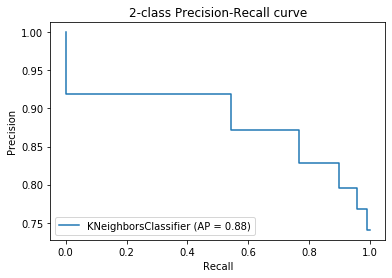

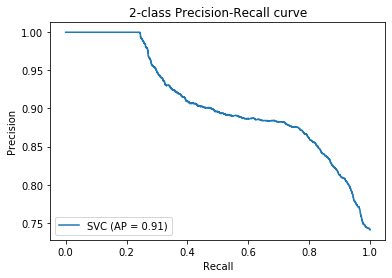

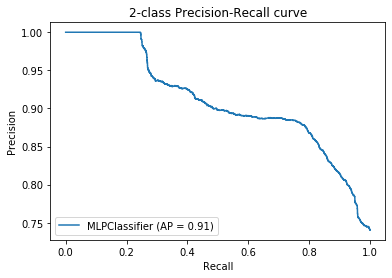

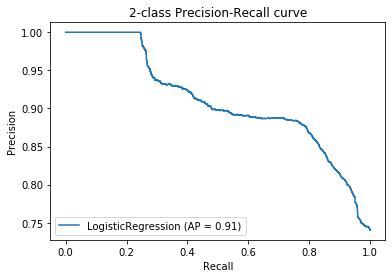

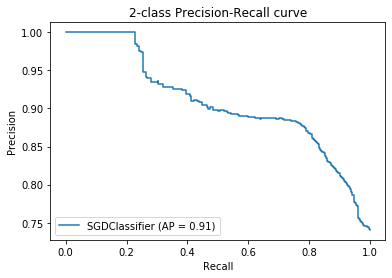

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','SVM','nn','lr','sgd']
classifier = [knn, SVM, nn, lr, sgd]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [18]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,All,SVM,6147,1569,729,414,0.776160,0.936900,0.796656,0.861105
2,All,nn,5973,1417,881,588,0.773676,0.910380,0.808254,0.856283
3,All,lr,6019,1460,838,542,0.774015,0.917391,0.804787,0.857407
4,All,sgd,6222,1744,554,339,0.764872,0.948331,0.781070,0.856612
0,k=6,knn,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
1,k=6,SVM,6135,1576,722,426,0.774015,0.935071,0.795617,0.859725
2,k=6,nn,6089,1526,772,472,0.774467,0.928060,0.799606,0.859058
3,k=6,lr,6016,1451,847,545,0.774692,0.916933,0.805678,0.857713
4,k=6,sgd,5714,1187,1111,847,0.770403,0.870904,0.827996,0.848908


# k=4

In [19]:
combination_name='k=4'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

X=np.array(data)[:,3:7].astype('float')
y=np.array(data)[:,8].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.74 (std = 0.00)
Score of nn = 0.76 (std = 0.04)
Score of lr = 0.77 (std = 0.04)
Score of sgd = 0.75 (std = 0.03)


In [20]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

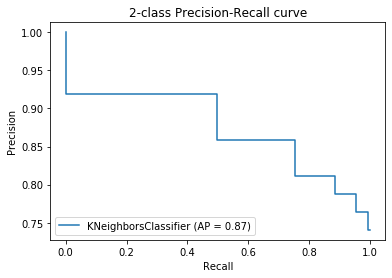

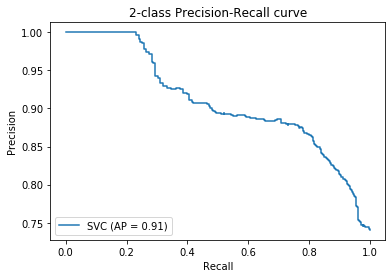

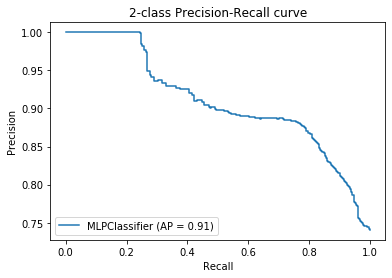

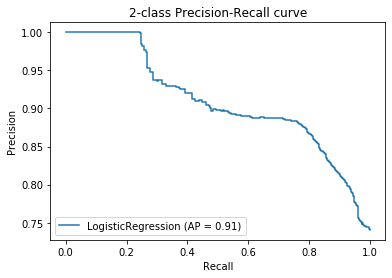

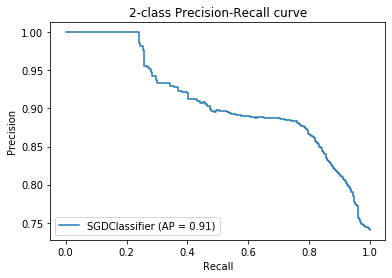

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','nn','lr','sgd']
classifier = [knn, nn, lr, sgd]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [22]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,All,SVM,6147,1569,729,414,0.776160,0.936900,0.796656,0.861105
2,All,nn,5973,1417,881,588,0.773676,0.910380,0.808254,0.856283
3,All,lr,6019,1460,838,542,0.774015,0.917391,0.804787,0.857407
4,All,sgd,6222,1744,554,339,0.764872,0.948331,0.781070,0.856612
0,k=6,knn,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
1,k=6,SVM,6135,1576,722,426,0.774015,0.935071,0.795617,0.859725
2,k=6,nn,6089,1526,772,472,0.774467,0.928060,0.799606,0.859058
3,k=6,lr,6016,1451,847,545,0.774692,0.916933,0.805678,0.857713
4,k=6,sgd,5714,1187,1111,847,0.770403,0.870904,0.827996,0.848908


# k=3

In [23]:
combination_name='k=3'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

d=data[['repeat_tag','freq_tag','hour','suspend']]
X=np.array(d)[:,0:3].astype('float')
y=np.array(d)[:,3].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.74 (std = 0.00)
Score of dtree = 0.77 (std = 0.03)
Score of sgd = 0.75 (std = 0.02)


In [24]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

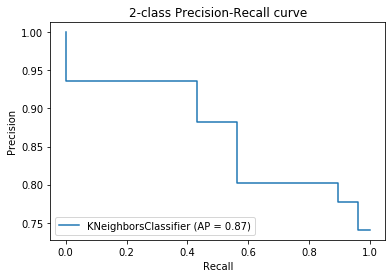

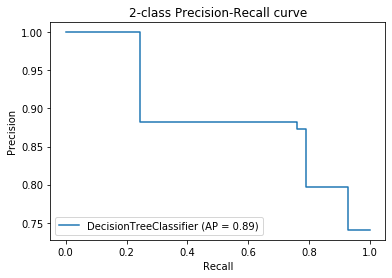

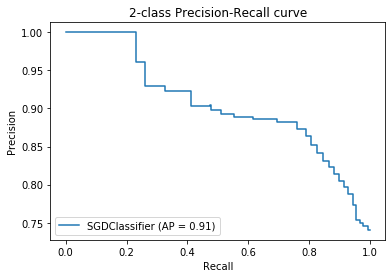

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','dtree','sgd']
classifier = [knn, dtree, sgd]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

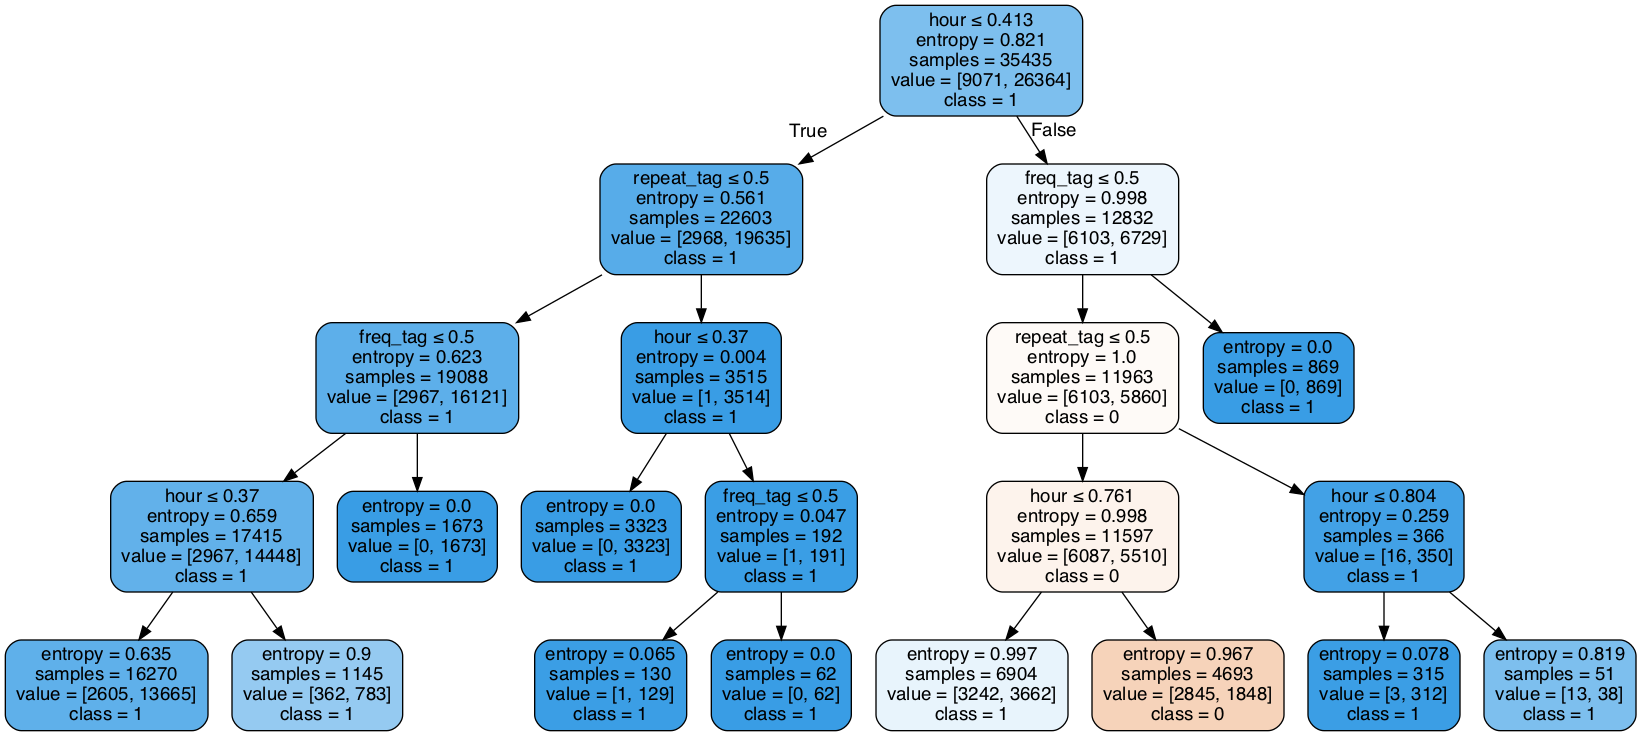

In [26]:
dot_data = StringIO()
feature_cols=list(d.columns[0:3])
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('/Volumes/BECCA/Project/Data/Result/China/By_classifier/%s/Decision Tree.png' %combination_name)

Image(graph.create_png())

In [27]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,All,SVM,6147,1569,729,414,0.776160,0.936900,0.796656,0.861105
2,All,nn,5973,1417,881,588,0.773676,0.910380,0.808254,0.856283
3,All,lr,6019,1460,838,542,0.774015,0.917391,0.804787,0.857407
4,All,sgd,6222,1744,554,339,0.764872,0.948331,0.781070,0.856612
0,k=6,knn,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
1,k=6,SVM,6135,1576,722,426,0.774015,0.935071,0.795617,0.859725
2,k=6,nn,6089,1526,772,472,0.774467,0.928060,0.799606,0.859058
3,k=6,lr,6016,1451,847,545,0.774692,0.916933,0.805678,0.857713
4,k=6,sgd,5714,1187,1111,847,0.770403,0.870904,0.827996,0.848908


# k=2

In [28]:
combination_name='k=2'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

d=data[['freq_tag','hour','suspend']]
X=np.array(d)[:,0:2].astype('float')
y=np.array(d)[:,2].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.74 (std = 0.00)
Score of dtree = 0.76 (std = 0.03)
Score of sgd = 0.74 (std = 0.02)


In [29]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]


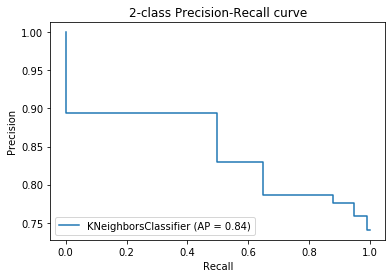

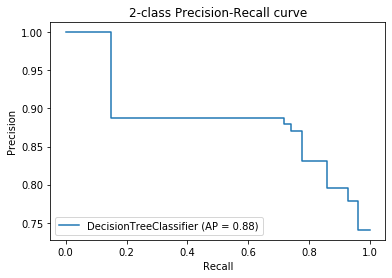

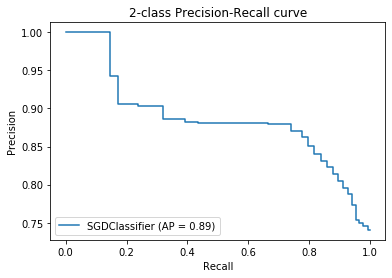

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','dtree','sgd']
classifier = [knn, dtree, sgd]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

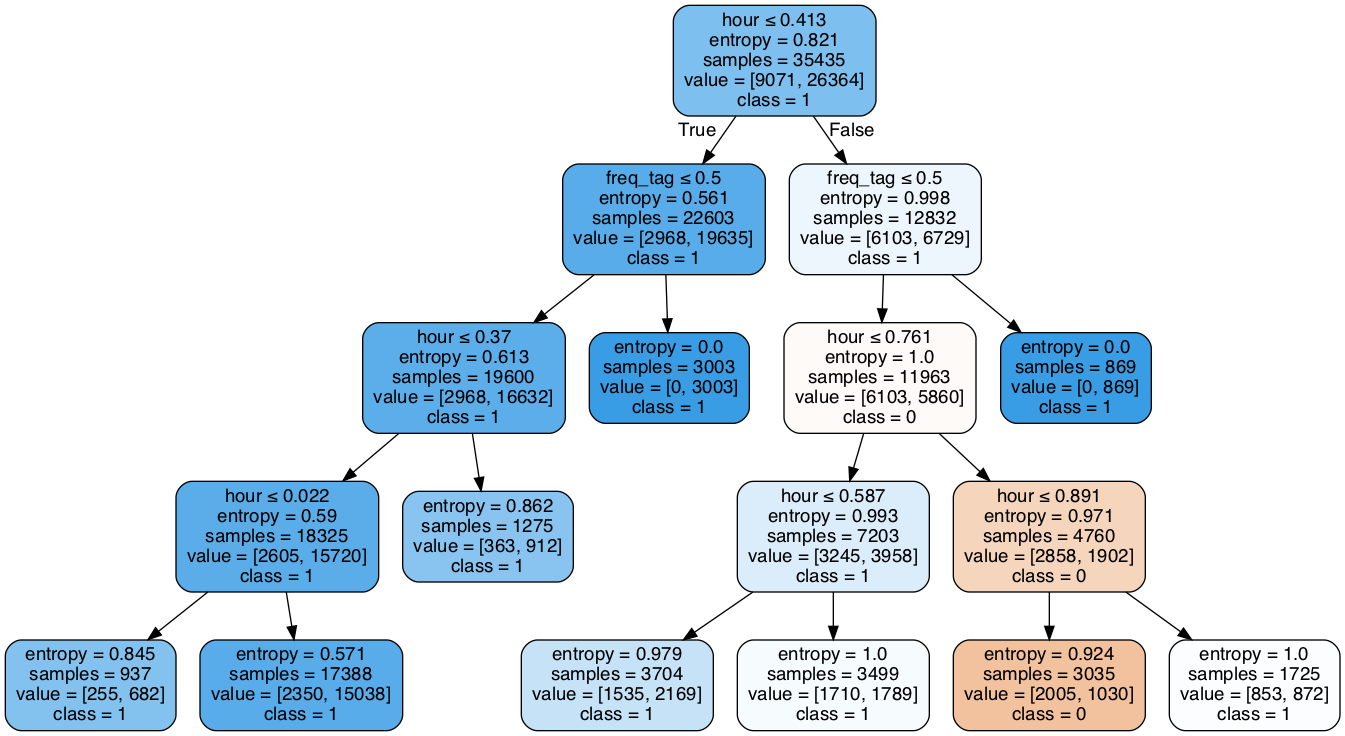

In [31]:
dot_data = StringIO()
feature_cols=list(d.columns[0:2])
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('/Volumes/BECCA/Project/Data/Result/China/By_classifier/%s/Decision Tree.png' %combination_name)

Image(graph.create_png())

In [32]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,All,SVM,6147,1569,729,414,0.776160,0.936900,0.796656,0.861105
2,All,nn,5973,1417,881,588,0.773676,0.910380,0.808254,0.856283
3,All,lr,6019,1460,838,542,0.774015,0.917391,0.804787,0.857407
4,All,sgd,6222,1744,554,339,0.764872,0.948331,0.781070,0.856612
0,k=6,knn,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
1,k=6,SVM,6135,1576,722,426,0.774015,0.935071,0.795617,0.859725
2,k=6,nn,6089,1526,772,472,0.774467,0.928060,0.799606,0.859058
3,k=6,lr,6016,1451,847,545,0.774692,0.916933,0.805678,0.857713
4,k=6,sgd,5714,1187,1111,847,0.770403,0.870904,0.827996,0.848908


# Tree-based feature selection

In [33]:
combination_name='Tree-based'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

d=data[['polarity_number','subjectivity_number','hour','minute','suspend']]
X=np.array(d)[:,0:4].astype('float')
y=np.array(d)[:,4].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]
在
print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:


In [34]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

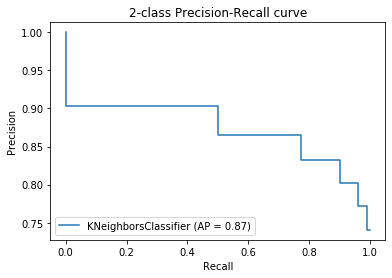

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn']
classifier = [knn]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [36]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,All,SVM,6147,1569,729,414,0.776160,0.936900,0.796656,0.861105
2,All,nn,5973,1417,881,588,0.773676,0.910380,0.808254,0.856283
3,All,lr,6019,1460,838,542,0.774015,0.917391,0.804787,0.857407
4,All,sgd,6222,1744,554,339,0.764872,0.948331,0.781070,0.856612
0,k=6,knn,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
1,k=6,SVM,6135,1576,722,426,0.774015,0.935071,0.795617,0.859725
2,k=6,nn,6089,1526,772,472,0.774467,0.928060,0.799606,0.859058
3,k=6,lr,6016,1451,847,545,0.774692,0.916933,0.805678,0.857713
4,k=6,sgd,5714,1187,1111,847,0.770403,0.870904,0.827996,0.848908


In [37]:
clf_result = clf_result.reset_index()
clf_result = clf_result.drop(['index'],axis=1)
clf_result.to_csv('/Volumes/BECCA/Project/Data/Result/China/By_classifier/Total_Result.csv')

In [38]:
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,All,SVM,6147,1569,729,414,0.776160,0.936900,0.796656,0.861105
2,All,nn,5973,1417,881,588,0.773676,0.910380,0.808254,0.856283
3,All,lr,6019,1460,838,542,0.774015,0.917391,0.804787,0.857407
4,All,sgd,6222,1744,554,339,0.764872,0.948331,0.781070,0.856612
5,k=6,knn,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
6,k=6,SVM,6135,1576,722,426,0.774015,0.935071,0.795617,0.859725
7,k=6,nn,6089,1526,772,472,0.774467,0.928060,0.799606,0.859058
8,k=6,lr,6016,1451,847,545,0.774692,0.916933,0.805678,0.857713
9,k=6,sgd,5714,1187,1111,847,0.770403,0.870904,0.827996,0.848908
